In [ ]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt #type: ignore
import seaborn as sns #type: ignore

# Data can be found at https://www.kaggle.com/code/renjithmadhavan/credit-card-fraud-detection-using-python/input
sns.set()
# loading the data
data = pd.read_csv("./creditcard.csv")
df = pd.DataFrame(data)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Getting a short description of the data
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Getting more info on the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


How many frauds are there?

In [5]:
classes = {0: "Not Fraud", 1: "Fraud"}

df.Class.value_counts().rename(index=classes)

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64

Plotting the variables using subplots

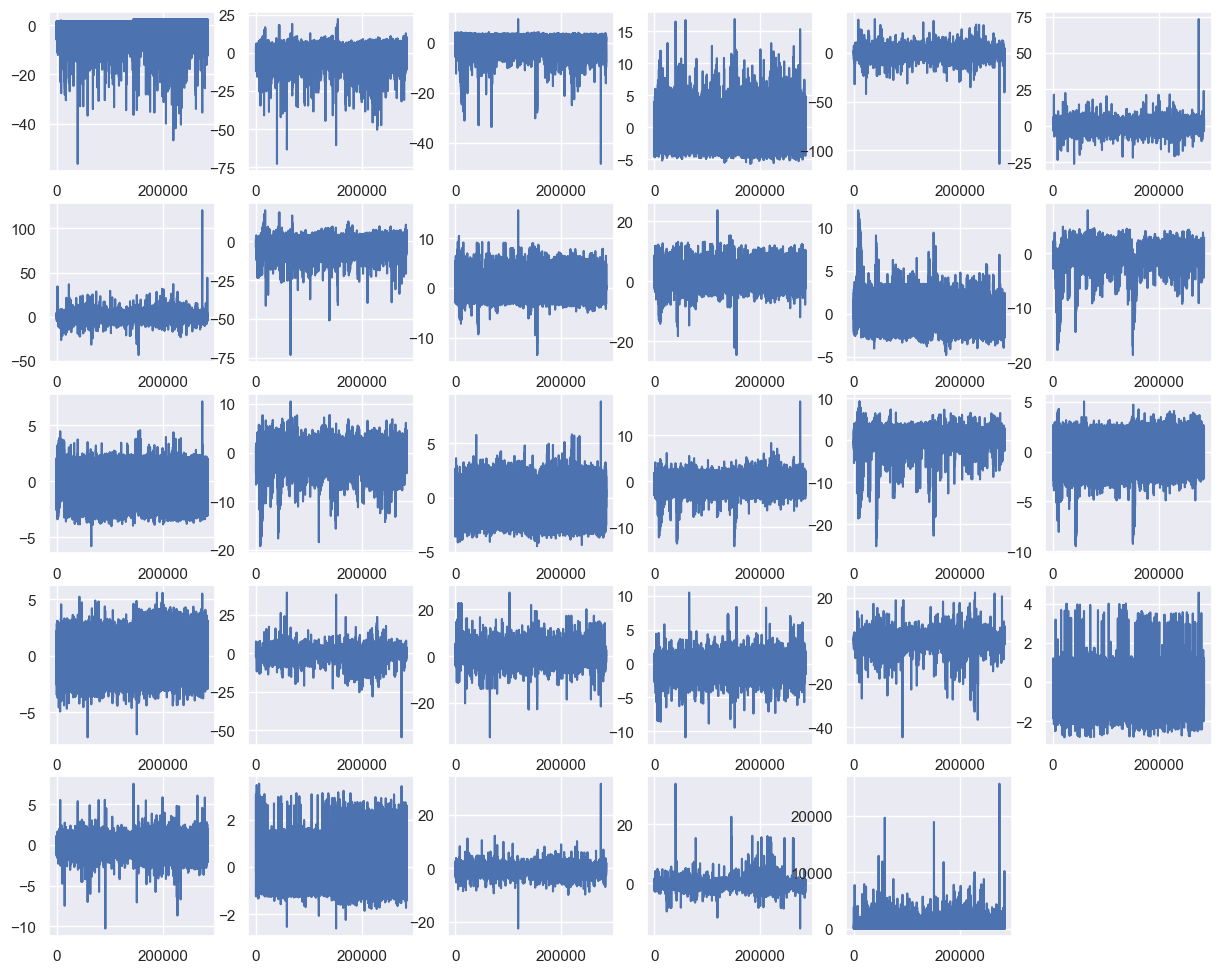

In [6]:
fig = plt.figure(figsize=(15,12))
plt.subplot(5,6,1); plt.plot(df.V1); plt.subplot(5,6,15); plt.plot(df.V15)
plt.subplot(5,6,2); plt.plot(df.V2); plt.subplot(5,6,16); plt.plot(df.V16)
plt.subplot(5,6,3); plt.plot(df.V3); plt.subplot(5,6,17); plt.plot(df.V17)
plt.subplot(5,6,4); plt.plot(df.V4); plt.subplot(5,6,18); plt.plot(df.V18)
plt.subplot(5,6,5); plt.plot(df.V5); plt.subplot(5,6,19); plt.plot(df.V19)
plt.subplot(5,6,6); plt.plot(df.V6); plt.subplot(5,6,20); plt.plot(df.V20)
plt.subplot(5,6,7); plt.plot(df.V7); plt.subplot(5,6,21); plt.plot(df.V21)
plt.subplot(5,6,8); plt.plot(df.V8); plt.subplot(5,6,22); plt.plot(df.V22)
plt.subplot(5,6,9); plt.plot(df.V9); plt.subplot(5,6,23); plt.plot(df.V23)
plt.subplot(5,6,10); plt.plot(df.V10); plt.subplot(5,6,24); plt.plot(df.V24)
plt.subplot(5,6,11); plt.plot(df.V11); plt.subplot(5,6,25); plt.plot(df.V25)
plt.subplot(5,6,12); plt.plot(df.V12); plt.subplot(5,6,26); plt.plot(df.V26)
plt.subplot(5,6,13); plt.plot(df.V13); plt.subplot(5,6,27); plt.plot(df.V27)
plt.subplot(5,6,14); plt.plot(df.V14); plt.subplot(5,6,28); plt.plot(df.V28)
plt.subplot(5,6,29); plt.plot(df.Amount)

Training the model

In [7]:
from sklearn.model_selection import train_test_split #type:ignore

feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1,30:].columns

print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


Separate independent and dependednt variables in two different dataframes

In [8]:
data_features = df[feature_names]
data_target = df[target]

print(data_features)
print(data_target)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.25141

Split the training and test data with 70% for the training data

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(data_features, data_target, train_size = 0.70, random_state = 1)

print(f"Length of X train is {len(X_train)}")
print(f"Length of X test is {len(X_test)}")
print(f"Length of Y train is {len(Y_train)}")
print(f"Length of Y test is {len(Y_test)}")


Length of X train is 199364
Length of X test is 85443
Length of Y train is 199364
Length of Y test is 85443


Train a logistic regression model

In [10]:
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.metrics import confusion_matrix # type: ignore

model = LogisticRegression()
model.fit(X_train, Y_train.values.ravel())



c:\Users\Taylor.Odhiambo\OneDrive - Kenya Airways PLC\Documents\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Make predictions with the model

In [11]:
predictions = model.predict(X_test)

Creating a confusion matrix to see how the model performed

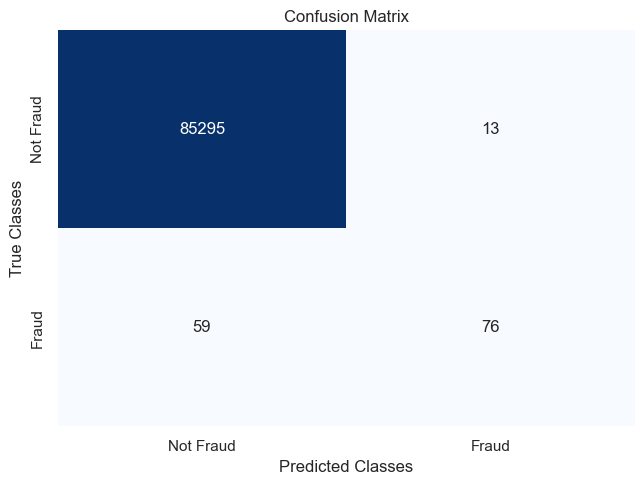

In [12]:
matrix = confusion_matrix(Y_test,predictions)

# Put the confusion matrix into a dataframe
class_names = ['Not Fraud', 'Fraud']
matrix_dataframe = pd.DataFrame(matrix, index = class_names, columns = class_names)
#Visualize the confusion matrix
sns.heatmap(matrix_dataframe, annot = True, cbar = None, cmap = "Blues", fmt = "g")

plt.title("Confusion Matrix"); plt.tight_layout()
plt.ylabel("True Classes"), plt.xlabel("Predicted Classes")
plt.show()

Model Evaluation

In [13]:
from sklearn.metrics import precision_score, recall_score # type: ignore

precision = round(precision_score(Y_test, predictions),2)
print(f"The Precision Score for the Logistic Regression model is {precision}")
recall = round(recall_score(Y_test, predictions),2)
print(f"The Recall Score for the Logistic Regression model is {recall}")

The Precision Score for the Logistic Regression model is 0.85
The Recall Score for the Logistic Regression model is 0.56


# Trying to improve the model with feaure scaling

View the features to observe their distribution in order to decide on the scaler to use

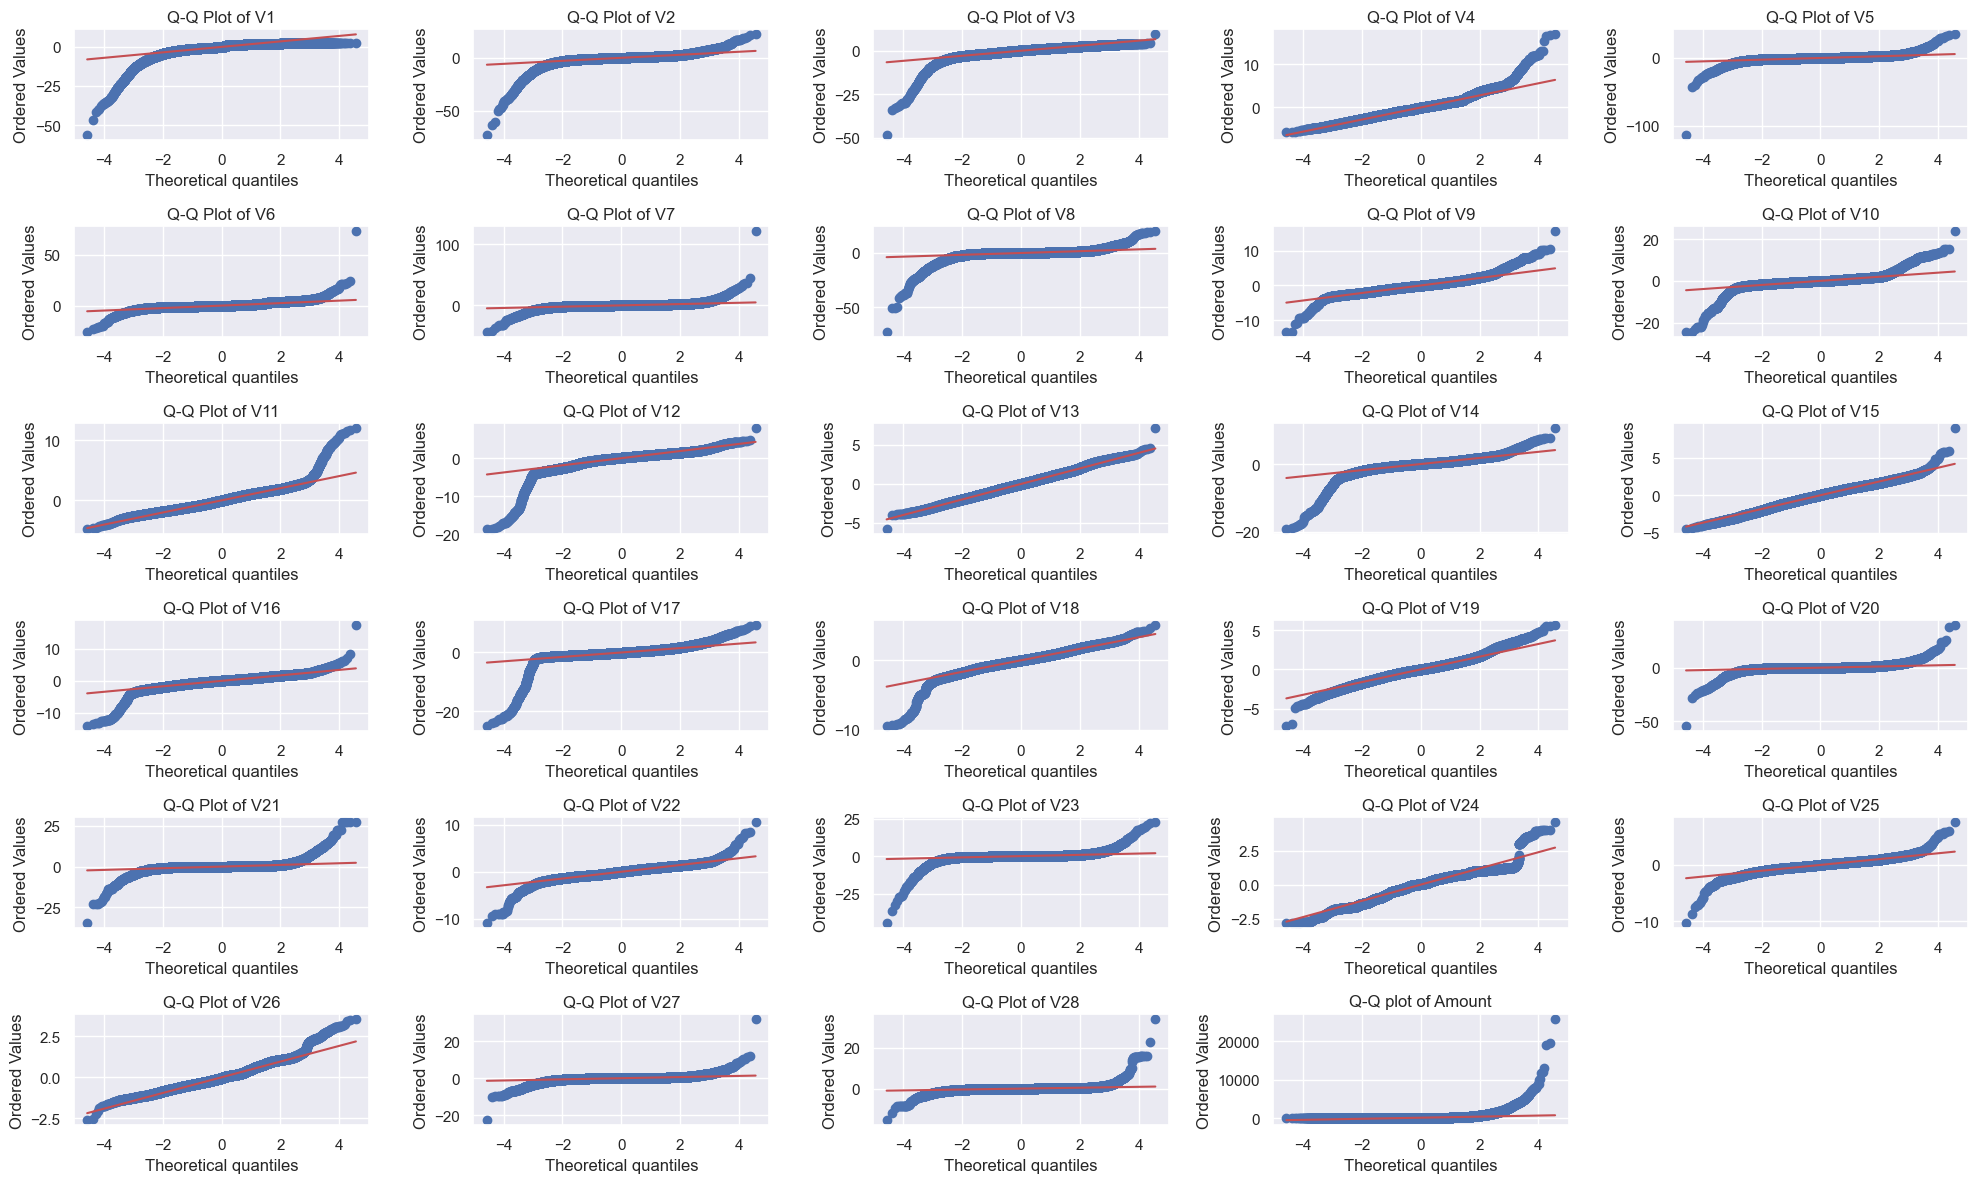

In [14]:
import scipy.stats as stats #type: ignore
# Plotting a Q-Q plot to see if the data in the features is a normal distribution

plt.figure(figsize = (20,12))

for x in range(1, 29):
    columns = f'V{x}'
    plt.subplot(6,5,x); stats.probplot(df[columns], dist = 'norm', plot = plt)
    plt.title(f"Q-Q Plot of V{x}")

plt.subplot(6,5,29); stats.probplot(df.Amount, dist = 'norm', plot = plt)
plt.title("Q-Q plot of Amount")
plt.tight_layout()
plt.show()


# Scale the features using min max scaling cause they seem to follow different distribution.

In [15]:
data_features2 = df[feature_names]
data_target2 = df[target]

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(data_features2, data_target2, train_size = 0.70, random_state = 1)

print(f"Length of X train is {len(X_train_2)}")
print(f"Length of X test is {len(X_test_2)}")
print(f"Length of Y train is {len(Y_train_2)}")
print(f"Length of Y test is {len(Y_test_2)}")

Length of X train is 199364
Length of X test is 85443
Length of Y train is 199364
Length of Y test is 85443


In [28]:
from sklearn.preprocessing import MinMaxScaler #type: ignore

# Assigning the scaler to the variable
scaler = MinMaxScaler()

# #Fit the scaler to just the training data
# scaler.fit(X_train_2)
# # Scale the training data
# X_train_scaled = scaler.transform(X_train_2)

# # Scale the test data
# X_test_scaled = scaler.transform(X_test_2)

def fit_min_max (df: pd.DataFrame) -> dict:
    # Store the min and max values of each feature
    min_max = {}

    for column in df.columns:
        min = df[column].min()
        max = df[column].max()

        min_max[column] = (min, max)

    return min_max

def transform_min_max (df: pd.DataFrame, min_max: dict) -> pd.DataFrame:

    scaled_df = df.copy()

    for column in df.columns:
        min,max = min_max[column]
        
        if min != max:
            scaled_df[column] = (scaled_df[column] - min) / (max - min)
        else:
            scaled_df[column] = 0.0

    return scaled_df

# Fit the scaler to the test data
scaler_fit = fit_min_max(X_train_2)

# Transform (scale) the train and test data
X_train_scaled = transform_min_max(X_train_2, scaler_fit)
X_test_scaled = transform_min_max(X_test_2,scaler_fit)




In [29]:
model2 = LogisticRegression()
model2.fit(X_train_scaled, Y_train_2.values.ravel())

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
predictions2 = model2.predict(X_test_scaled)

Create a confusion matrix to assess the model performance when values are scaled

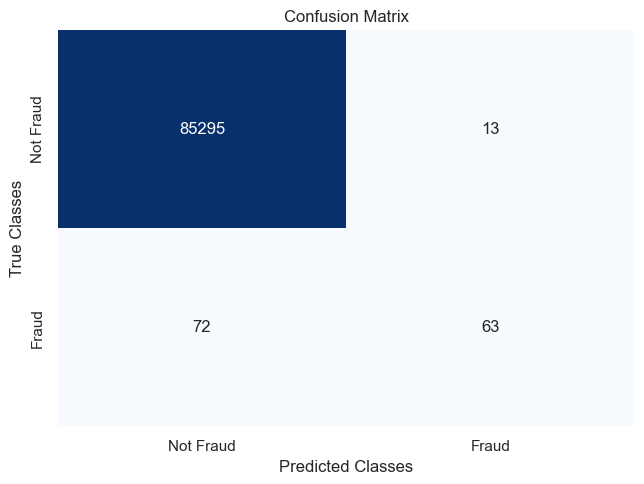

In [31]:

matrix2 = confusion_matrix(Y_test_2,predictions2)

matrix2_dataframe = pd.DataFrame(matrix2, index = class_names, columns = class_names)

sns.heatmap(matrix2_dataframe, annot = True, cbar = None, fmt = "g", cmap = "Blues")

plt.title("Confusion Matrix"); plt.tight_layout()
plt.ylabel("True Classes"), plt.xlabel("Predicted Classes")
plt.show()

In [32]:
precision2 = round(precision_score(Y_test_2, predictions2),2)
print(f"The Precision Score for the Logistic Regression model is {precision2}")
recall2 = round(recall_score(Y_test_2, predictions2),2)
print(f"The Recall Score for the Logistic Regression model is {recall2}")

The Precision Score for the Logistic Regression model is 0.83
The Recall Score for the Logistic Regression model is 0.47
